# Graphs/Chart/Plot

Data visualization is a important tool in the data scientists toolbox. By shaping or organizing our data to be more visual understandable/comparable greater understand o the data can be achieved, be it for your own understandings sake or to inform others. 

For this lecture we will make a few useful common graphs using matplotlib and also give a some tips of things to consider when making graphs. 

## Matplotlib
Python has a host of graphic libraries and frameworks other then matploblib. Seaborn, plotly, bokeh, altair, pygal and frameworks so why matplotlib?


* It's very well documented and have a lot of community resources: 
    There are about 60k Questions on stack overflow about matplotlib
    (https://stackoverflow.com/questions/tagged/matplotlib)
* It's quite granular and have a host of features available.  

## Seaborn 
Seaborn is a very useful library that wraps matplotlib and can be used as a boilerplate for common data science graphics.


## Bar graph


<BarContainer object of 2 artists>

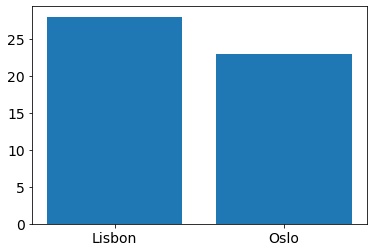

In [159]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})
city = ["Lisbon", "Oslo"]
mean_temp_july_high = [28, 23] 
mean_temp_july_low = [18, 13] 
plt.bar(city, avg_temp_july_high)


<BarContainer object of 2 artists>

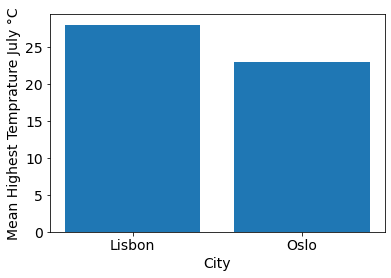

In [160]:
plt.ylabel("Mean Highest Temprature July °C")
plt.xlabel("City")
plt.bar(city, avg_temp_july_high)


Text(0.5, 0, 'City')

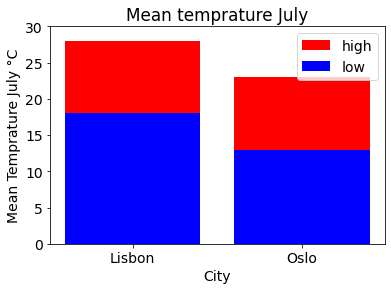

In [161]:
mean_temp_july_difference = [10,10]

fig, ax = plt.subplots()
high_bar = ax.bar(city, mean_temp_july_high, label="high", color="red")
low_bar = ax.bar(city, mean_temp_july_low, label="low", color="blue")
ax.legend()
# ax.bar(city, height=mean_temp_july_difference, bottom=mean_temp_july_low)
plt.ylim([0,30])
ax.set_title("Mean temprature July")
# ax.bar_label(high_bar, padding=-15, color="black")
# ax.bar_label(low_bar, padding=-15, color="white")
plt.ylabel("Mean Temprature July °C")
plt.xlabel("City")



## Line chart

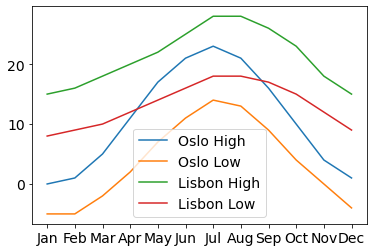

In [162]:
import numpy as np
oslo_high_temp_mean = [0,1,5,11,17,21,23,21,16,10,4,1]
oslo_low_temp_mean = [-5,-5,-2,2,7,11,14,13,9,4,0,-4]
lisbon_high_team_mean =[15,16,18,20,22,25,28,28,26,23,18,15]
lisbon_low_team_mean =[8,9,10,12,14,16,18,18,17,15,12,9]

months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

fig, ax = plt.subplots()



ax.plot(oslo_high_temp_mean, label="Oslo High")
ax.plot(oslo_low_temp_mean, label="Oslo Low")
ax.plot(lisbon_high_team_mean, label="Lisbon High")
ax.plot(lisbon_low_team_mean, label="Lisbon Low")

plt.xticks(np.arange(12), labels=months)
ax.legend()


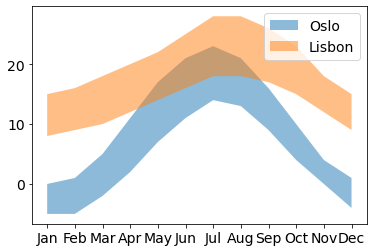

In [163]:
fig, ax = plt.subplots()
plt.xticks(np.arange(12), labels=months)
ax.fill_between(np.arange(12), oslo_high_temp_mean, oslo_low_temp_mean, alpha=0.5, label="Oslo")
ax.fill_between(np.arange(12), lisbon_high_team_mean, lisbon_low_team_mean, alpha=0.5, label ="Lisbon")

ax.legend()



## Scatter plot
Large number of datapoints, showing a relationship between two variables/dimentions.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   species  150 non-null    int32
dtypes: int32(1)
memory usage: 728.0 bytes


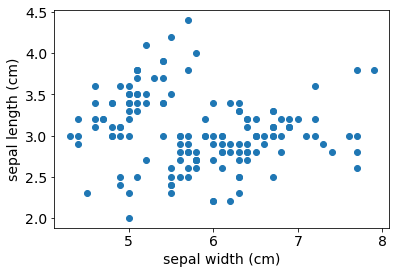

In [164]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()

iris_df = pd.DataFrame(data= iris.data, columns= iris.feature_names)

target_df = pd.DataFrame(data= iris.target, columns= ['species'])

target_df.info()
target_df['species'] = target_df['species'].astype(str)
target_df['species'] = target_df['species'].replace("0", "setosa")
target_df['species'] = target_df['species'].replace("1", "versicolor")
target_df['species'] = target_df['species'].replace("2", "virginica")

#Join them togheter
iris_df = pd.concat([iris_df, target_df], axis= 1)

iris_df.head()

plt.xlabel("sepal width (cm)")
plt.ylabel("sepal length (cm)")

plt.scatter(iris_df["sepal length (cm)"], iris_df["sepal width (cm)"])


# plt.scatter(iris_df["sepal length (cm)"], iris_df["sepal width (cm)"], iris_df["petal length (cm)"]*4, iris_df["petal width (cm)"])


# setosa = iris_df[iris_df["species"] == "setosa"]
# versicolor = iris_df[iris_df["species"] == "versicolor"]
# virginica = iris_df[iris_df["species"] == "virginica"]

# plt.scatter(setosa["sepal length (cm)"], setosa["sepal width (cm)"])
# plt.scatter(versicolor["sepal length (cm)"], versicolor["sepal width (cm)"])
# plt.scatter(virginica["sepal length (cm)"], virginica["sepal width (cm)"])


## Histogram 
Interval data

(array([ 9., 23., 14., 27., 16., 26., 18.,  6.,  5.,  6.]),
 array([4.3 , 4.66, 5.02, 5.38, 5.74, 6.1 , 6.46, 6.82, 7.18, 7.54, 7.9 ]),
 <BarContainer object of 10 artists>)

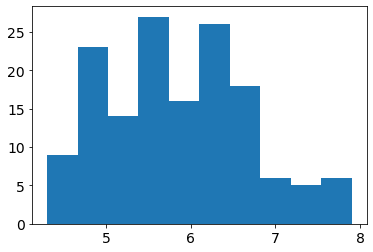

In [165]:
virginica = iris_df[iris_df["species"] == "virginica"]

plt.hist(iris_df["sepal length (cm)"], 10)

# plt.hist(virginica["sepal length (cm)"], 10)


## Dos and donts of graphics

Making useful graphs are not always easy, following is some tips/checklist that should help you make them a little better. 

* Consider your audience who are going to see this graph. In order to understand this graph, what do they already know, what do they need to know.
* Ideally the graph should not need additional text to explain it. (this might not always be achievable)
* Less is more, just because you can doesn't mean you should. More features/addons can make the graph look cluttered and hard to find a overview in
* Remember to label your axis
* Don't misuse the axis. 
* Squint test. Can this graph be viewed and understood if you squint?  
* review your colors. Can the graph be viewed by colorblind? in black and white? 

### Example of misuse of axis



<BarContainer object of 2 artists>

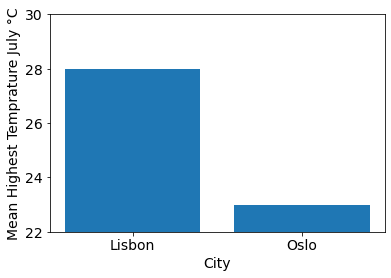

In [166]:
city = ["Lisbon", "Oslo"]
mean_temp_july_high = [28, 23] 
plt.ylim([22,30])
plt.ylabel("Mean Highest Temprature July °C")
plt.xlabel("City")
plt.bar(city, avg_temp_july_high)